<a href="https://colab.research.google.com/github/ttogle918/AI_projects/blob/master/s1_vgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다음 분기에 어떤 게임을 설계해야 할까?**
-----------------

**data 이름 설명**
+ Name : 게임의 이름입니다.
+ Platform : 게임이 지원되는 플랫폼의 이름입니다.
+ Year : 게임이 출시된 연도입니다.
+ Genre : 게임의 장르입니다.
+ Publisher : 게임을 제작한 회사입니다.
+ NA_Sales : 북미지역에서의 출고량입니다.
+ EU_Sales : 유럽지역에서의 출고량입니다.
+ JP_Sales : 일본지역에서의 출고량입니다.
+ Other_Sales : 기타지역에서의 출고량입니다.

이 프로젝트는 아래와 같이 구성되어있습니다.
- 데이터 불러오기 / 정리
- 각 지역끼리 판매량을 비교, 양의 상관관계를 갖는지 확인
- 세운 가설이 맞는지 F-test를 통해 확인
- 어떤 지역의 판매량이 가장 높은가?
- 장르의 트렌드는 무엇인가? (연도별, 장르별 총 합계)
- 가장 많은 장르의 지역별 판매량 평균
- 플랫폼 순위 (2015년 이후 순위, 전체 순위)
- 데이터를 4가지 묶음으로 나누기

In [1]:
# google drive에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# csv파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/vgames2.csv", engine='python')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


우선 데이터를 계산하기 위하여 **통일되게 정리하는 과정**을 거칩니다.

1. 계산을 위해서 숫자로 변환
2. 판매량의 단위를 100만으로 통일
3. 연도를 4자리로 통일
4. 연도에 대해 입력되지 않은 데이터는 0으로 치환

**부가설명**

아래 Sales의 기준은 100만(M)이다.
- 1k = one thousand (1,000)
- 10k = ten thousand (10,000)
- 100k = 100 thousand (100,000)
- 1M = 1000K (100만)

In [3]:
def toFloat(n) :
  try :
    return float(n)
  except ValueError :
    if n[-1] == 'M' :
      return float(n[0:-1])
    elif n[-1] == 'K' :
      return float(n[0:-1])/1000
    else :
      print(n)
  return 'cannot toInt' # 1개라도 있으면 dtype이 object가 됨

def setYear(y) :
  if y > 2021 :
    print(y)
    return '-1'
  if y > 99 :
    return int(y)
  elif y < 22 :
    return int(2000 + y)
  elif y > 21 :
    return int(1900 + y)

# 계산을 위해 data를 숫자형으로 변환 
df['NA_Sales'] = df['NA_Sales'].apply(toFloat)
df['EU_Sales'] = df['EU_Sales'].apply(toFloat)
df['JP_Sales'] = df['JP_Sales'].apply(toFloat)
df['Other_Sales'] = df['Other_Sales'].apply(toFloat)

df['Year'] = df['Year'].apply(setYear)
df.isnull().sum() # 혹시나 0년 == 2000년일 수도 있으니까 year 변환 뒤 nan을 0으로 치환
df['Year'] = df['Year'].fillna(0)
print("min year ", min(df['Year']) )
print("max NA_Sales", max(df['NA_Sales']) )

labels_genre = df['Genre'].unique()
labels_genre = labels_genre[0:-1] # nan 제거
labels_platform = set(df['Platform'])

min year  0.0
max NA_Sales 41.49


###일단 각 **지역의 판매량**을 비교해보겠습니다.

###만일 각 게임이 모든 지역에서 판매량이 비슷하다면 양의 상관관계(양의 방향인 직선) 형태가 나올 것이고, 특정한 지역에서 판매량이 좋다면 직선형태가 아닌 형태가 나올 것입니다.

###아래의 그래프를 통해 인기있는 게임이 모든 지역에서 인기있는지, 혹은 특정한 지역에서 인기가 좋은 지 여부를 알 수 있습니다.

Text(0, 0.5, 'Other_Sales')

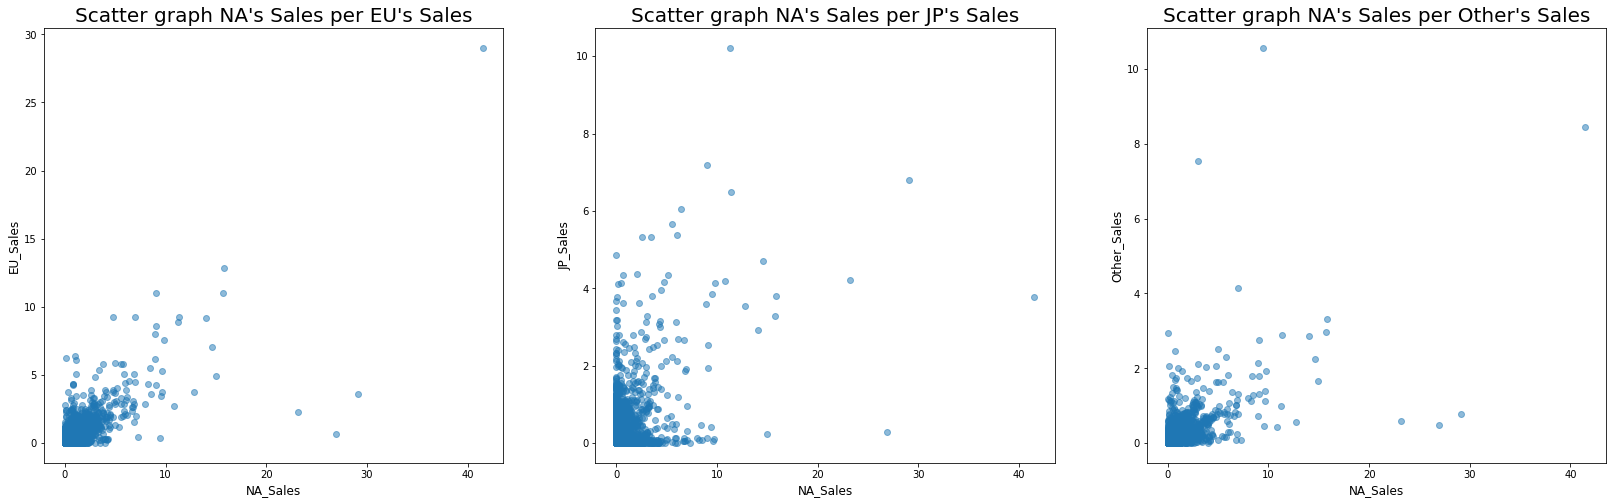

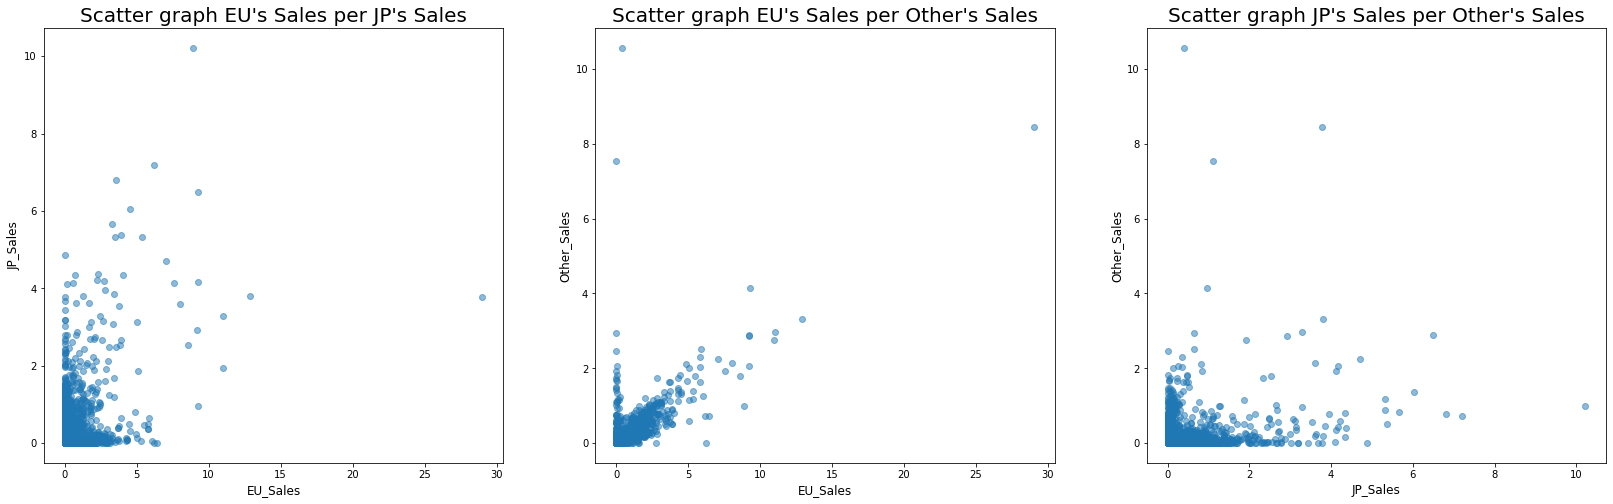

In [4]:
plt.figure(figsize=(28,8))
plt.subplot(1, 3, 1)
plt.scatter(df['NA_Sales'], df['EU_Sales'], alpha = .5)
plt.title('Scatter graph NA\'s Sales per EU\'s Sales', fontsize=20)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('EU_Sales', fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(df['NA_Sales'], df['JP_Sales'], alpha = .5)
plt.title('Scatter graph NA\'s Sales per JP\'s Sales', fontsize=20)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('JP_Sales', fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(df['NA_Sales'], df['Other_Sales'], alpha = .5)
plt.title('Scatter graph NA\'s Sales per Other\'s Sales', fontsize=20)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('Other_Sales', fontsize=12)

plt.figure(figsize=(28,8))

plt.subplot(1, 3, 1)
plt.scatter(df['EU_Sales'], df['JP_Sales'], alpha = .5)
plt.title('Scatter graph EU\'s Sales per JP\'s Sales', fontsize=20)
plt.xlabel('EU_Sales', fontsize=12)
plt.ylabel('JP_Sales', fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(df['EU_Sales'], df['Other_Sales'], alpha = .5)
plt.title('Scatter graph EU\'s Sales per Other\'s Sales', fontsize=20)
plt.xlabel('EU_Sales', fontsize=12)
plt.ylabel('Other_Sales', fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(df['JP_Sales'], df['Other_Sales'], alpha = .5)
plt.title('Scatter graph JP\'s Sales per Other\'s Sales', fontsize=20)
plt.xlabel('JP_Sales', fontsize=12)
plt.ylabel('Other_Sales', fontsize=12)

위의 산포도를 통해 NA와 EU, EU와 기타 나라들의 판매량 관계가 비슷하다는 것을 알 수 있습니다. 

하지만 JP(일본) 지역의 판매량과는 같은 방향으로 향하지 않았습니다.

이 부분은 단순히 선호도의 경우일 수도 있지만, 일본에는 출시되지 않은 게임이거나 플랫폼일 가능성을 열어둘 수 있습니다.



# **F-test : 여러 그룹간의 산포도의 차이가 있는지를 확인하는 통계방법**

여러 그룹들이 하나의 분포에서 왔다는 가정하에 통계값을 구하는 방법입니다.

**F값이 높다 = 다른 그룹끼리 분포가 다를 것이다.**


**귀무가설 : 북미지역, 유럽지역, 일본지역에서의 판매량은 비슷하다.**
 
- 미국 : 3.295억 (2020년)

- 유럽 : 7.464억 (2018년)
 
- 일본 : 1.258억 (2020년)

In [5]:
# scipy를 upgrade해야 아래 코드 실행 가능.
# !pip install --upgrade scipy  

In [6]:
from scipy.stats import f_oneway
import math

st, pv = f_oneway(df['NA_Sales'], df['EU_Sales'], df['JP_Sales'])

print("F-stat :", st)
print("p-value : ", round(pv, 10)) # 반올림하여 소수점아래 10의자리까지 나타냄

F-stat : 436.9320561747084
p-value :  0.0


위의 통계치에 따르면 p-value가 0.01이하이기 때문에 귀무가설이 옳을 확률이 1% 이하입니다.

(사실상 확률이 거의 0%에 수렴)

### 따라서 북미지역, 유럽지역, 일본지역에서의 **판매량은 비슷하지 않습니다.**

# **그렇다면 어떤 지역이 가장 판매량이 높은지 살펴보도록 하겠습니다.**

# **게임의 트렌드가 연도별로 차이가 있을까?**

### 우선 **장르의 트랜드**를 알아보도록 하겠습니다.

# **각 연도별 출시된 비디오게임의 장르를 나타낸 선 그래프**

아래와 같이 Action 장르가 거의 매 해 가장 많이 출시되었습니다. 

이 그래프를 보고 Action 장르가 실제로 판매량도 높은가 확인해보려고 합니다.

In [7]:
wide = df.pivot_table(index = 'Year', columns = 'Genre', values = 'Name', aggfunc=len)
wide = wide.fillna(0)
wide = wide[1:]
wide.tail()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2014.0,186.0,75.0,23.0,41.0,10.0,8.0,27.0,91.0,47.0,11.0,55.0,8.0
2015.0,253.0,53.0,21.0,39.0,14.0,6.0,19.0,78.0,34.0,15.0,62.0,17.0
2016.0,119.0,34.0,14.0,18.0,10.0,0.0,20.0,40.0,32.0,9.0,38.0,10.0
2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


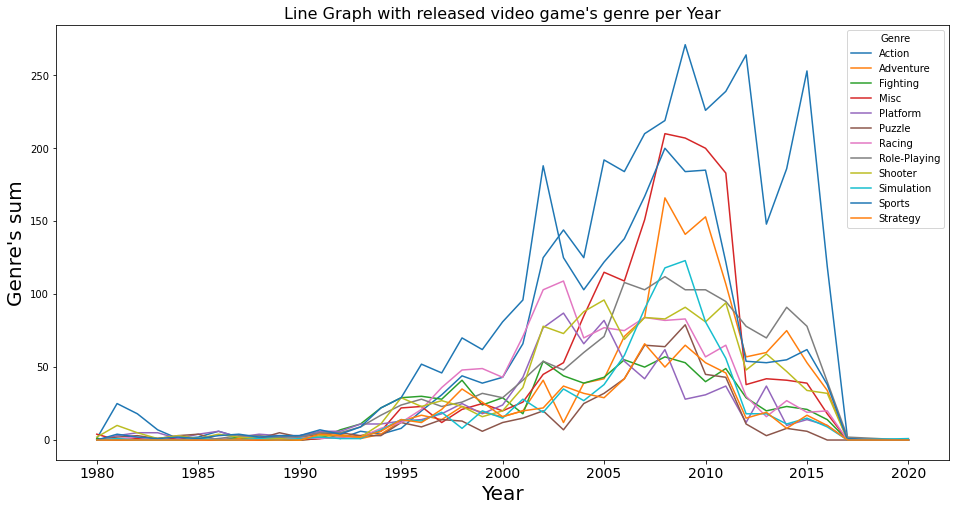

In [8]:
fig = wide.plot(kind='line', figsize=(16, 8))
plt.title('Line Graph with released video game\'s genre per Year', fontsize=16)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Genre\'s sum', fontsize=20)
plt.xticks(fontsize= 14)
plt.show()

# **비디오게임 장르별 총 합계**

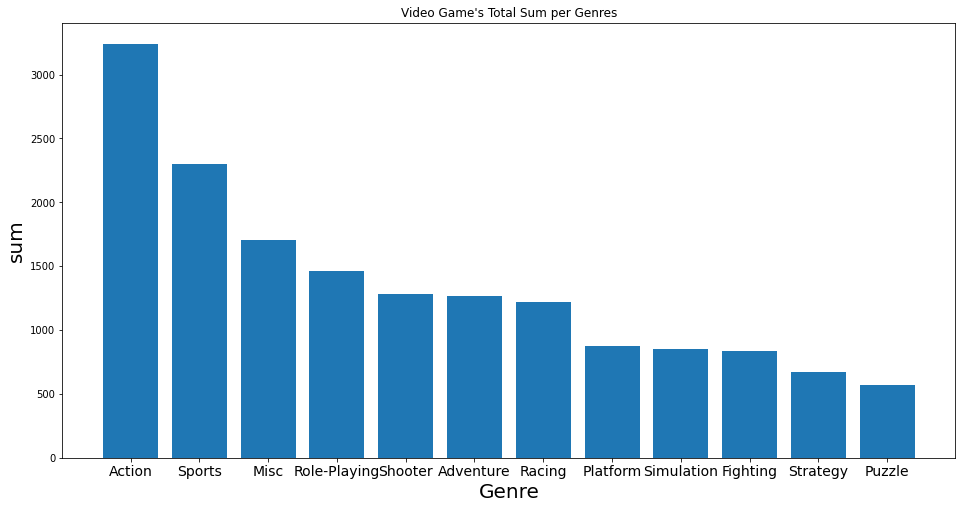

In [9]:
df_genresum = wide.sum()
df_genresum = df_genresum.sort_values(ascending=False)
index = np.arange(len(df_genresum))
plt.figure(figsize=(16,8))
plt.bar(index, df_genresum)
plt.title('Video Game\'s Total Sum per Genres')
plt.xlabel('Genre', fontsize=20)
plt.ylabel('sum', fontsize=20)
plt.xticks(index, df_genresum.index, fontsize=14)
plt.show()

# 그렇다면, 지역에 따라서 선호하는 게임 장르가 다를까?

## 장르별 판매량을 지역에 따라서 막대그래프 생성

장르별 판매량을 지역에 따라 각각 막대그래프를 생성하였습니다.

In [10]:
def makeDataframe(string, genres, country_sales) :
  df1 = pd.DataFrame(columns=country_sales, index=genres)

  for genre in genres :
    df2 = df[df[string] == genre]
    for sale in country_sales :
      df1.loc[genre][sale] = df2[sale].sum()
  
  return df1
df1 = makeDataframe('Genre', labels_genre, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

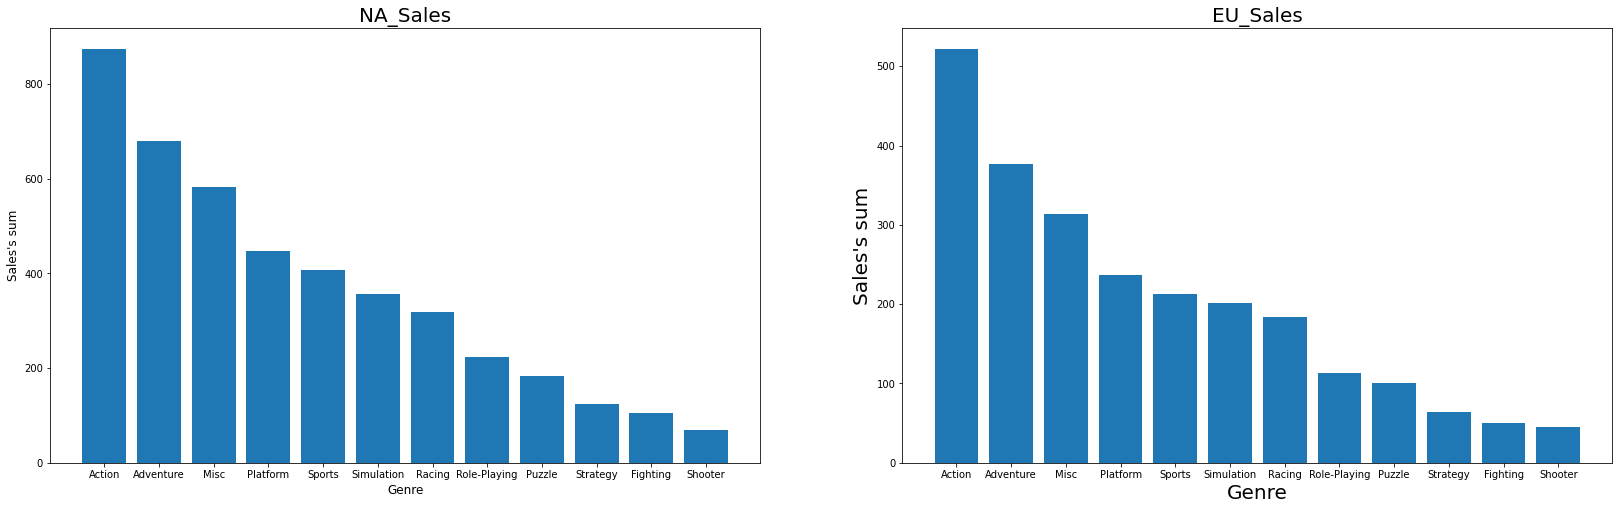

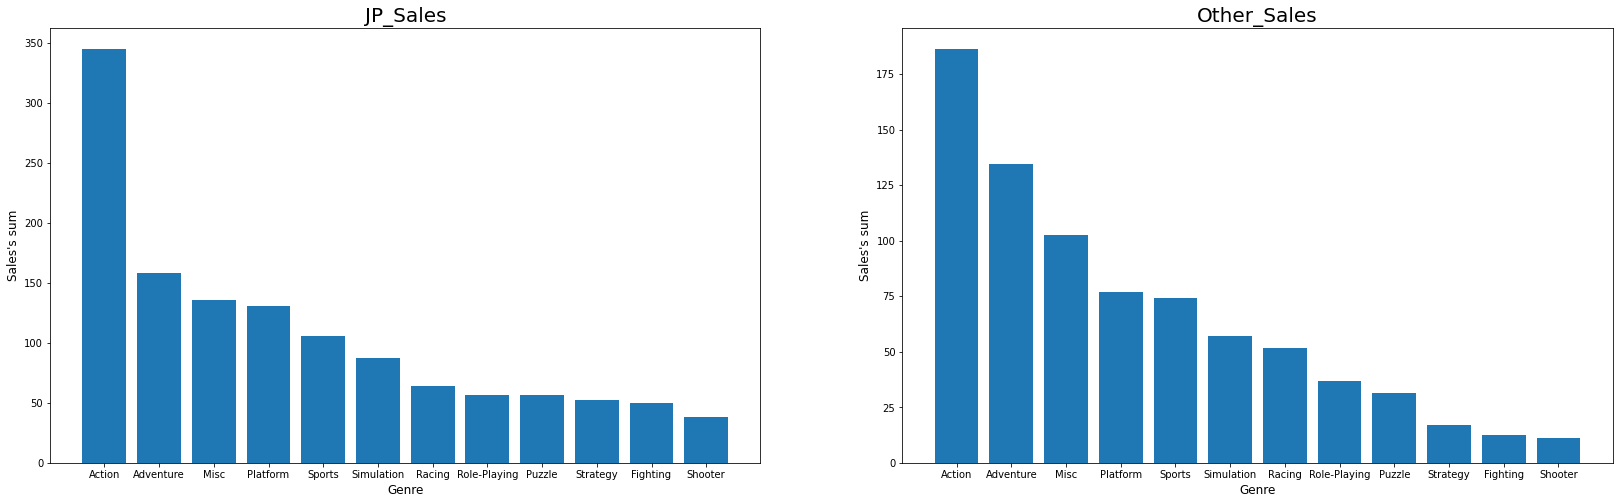

In [11]:
index = np.arange(len(df1))
plt.figure(figsize=(28,8))
plt.subplot(1, 2, 1)
plt.bar(index, df1['NA_Sales'].sort_values(ascending=False))
plt.title('NA_Sales', fontsize=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(index, df1['EU_Sales'].sort_values(ascending=False))
plt.title('EU_Sales', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Sales\'s sum', fontsize=20)
plt.xticks(index, df1.index, fontsize=10)


plt.figure(figsize=(28,8))
plt.subplot(1, 2, 1)
plt.bar(index, df1['JP_Sales'].sort_values(ascending=False))
plt.title('JP_Sales', fontsize=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(index, df1['Other_Sales'].sort_values(ascending=False))
plt.title('Other_Sales', fontsize=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.show()

### 가장 많은 장르인 Action 장르의 지역별 판매량의 평균을 보도록 하겠습니다.

['NA', 'EU', 'JP', 'Others']


([<matplotlib.axis.XTick at 0x7f2bcff759d0>,
 [Text(0, 0, 'NA'), Text(0, 0, 'EU'), Text(0, 0, 'JP'), Text(0, 0, 'Others')])

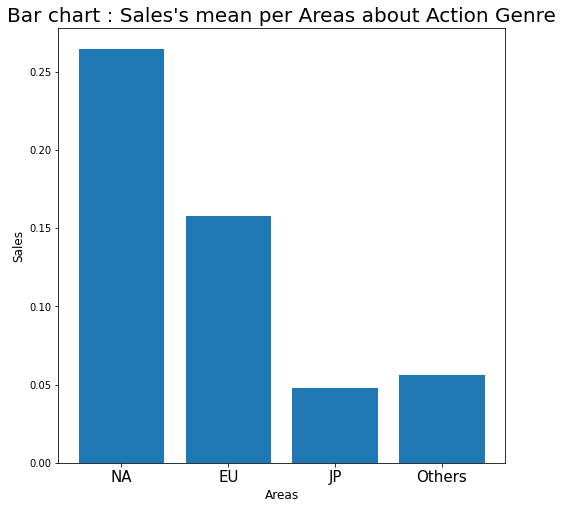

In [12]:
mean_Sales = []
mean_Sales.append(df[df['Genre'] == 'Action'].NA_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].EU_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].JP_Sales.mean())
mean_Sales.append(df[df['Genre'] == 'Action'].Other_Sales.mean())

label_mean = ['NA', 'EU', 'JP', 'Others']
print(label_mean)

index = np.arange(len(mean_Sales))
plt.figure(figsize=(8,8)) ## 캔버스 생성
plt.bar(label_mean, mean_Sales)
plt.title('Bar chart : Sales\'s mean per Areas about Action Genre', fontsize=20)
plt.xlabel('Areas', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, label_mean, fontsize=15)

# 게임의 트렌드가 연도별로 차이가 있을까?

### 플랫폼의 트랜드에 대해서도 알아보도록 하겠습니다.

# 최근(2015년 이후) Platform 순위
최근 비디오 게임의 플랫폼 순위를 여러 그래프를 통해 보겠습니다.

우선, 시리즈가 다른 플랫폼을 같다고 가정하고 고쳐보았습니다.
1. PS : PS, PS2, PS3, PS4, PSP, PSV
2. DS : 3DS,N64, GC, GBA, NES, SNES, DS
3. XB : X360, XB, XOne

그리고 데이터셋에 미국, 유럽, 일본, 기타 나라의 판매량을 모두 더한 값을 추가합니다.

In [13]:

def setPlatform(string) :
  if string in ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'] :
    return 'PS'
  elif string in ['3DS','N64', 'GC','GBA', 'NES', 'SNES', 'DS'] :
    return 'DS'
  elif string in ['X360', 'XB', 'XOne'] :
    return 'XB'
  elif string in ['Wii', 'WiiU'] :
    return 'Wii'
  return string

df['Platform'] = df['Platform'].apply(setPlatform)
labels_platform = set(df['Platform'])
df_sample = df[df['Year'] >= 2015]
print(labels_platform)
df_sample['Sales_sum'] = df_sample['NA_Sales']+ df_sample['EU_Sales']+ df_sample['JP_Sales']+ df_sample['Other_Sales']

{'DC', 'Wii', 'GEN', 'GG', 'SAT', 'GB', 'WS', 'PCFX', 'NG', '2600', 'PC', '3DO', 'XB', 'DS', 'SCD', 'TG16', 'PS'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
chart_sample = []
labels_sample = []
i = 0
for s in labels_platform :
  num = sum(df_sample[df_sample['Platform']==s].Sales_sum)
  if num > 0 :
    chart_sample.append(num)
    labels_sample.append(s)
    
print(chart_sample)
print(labels_sample)
print(len(labels_sample))

[21.21, 10.629999999999992, 83.89999999999998, 33.81, 185.92000000000013]
['Wii', 'PC', 'XB', 'DS', 'PS']
5


# 최근 출시된 게임 시장의 **플랫폼 점유율**을 파이차트와 막대그래프를 통해서 보겠습니다.

([<matplotlib.axis.XTick at 0x7f2bcff39650>,
 [Text(0, 0, 'Wii'),
  Text(0, 0, 'PC'),
  Text(0, 0, 'XB'),
  Text(0, 0, 'DS'),
  Text(0, 0, 'PS')])

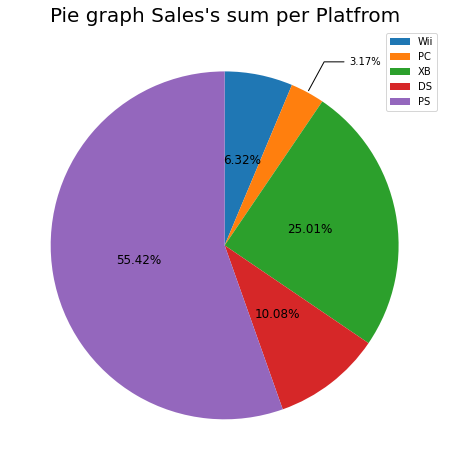

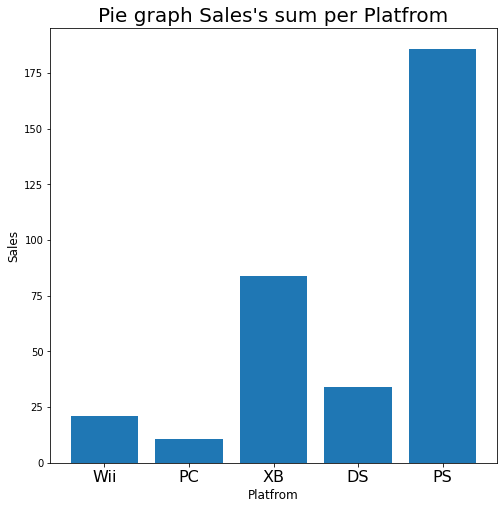

In [15]:
def drawPiePlot(labels, frequency) :
  fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
  fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
  ax = fig.add_subplot() ## 프레임 생성
  
  pie = ax.pie(frequency, ## 파이차트 출력
        startangle=90, ## 시작점을 90도(degree)로 지정
        counterclock=False, ## 시계방향으로 그려짐
        )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5 ## 상한선 비율
  sum_pct = 0 ## 퍼센티지
  
  bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
  
  ## annotation 설정
  config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
  
  for i,l in enumerate(labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
      
      if i < len(labels) - 1:
          sum_pct += float(f'{frequency[i]/total*100:.2f}')
          text = f'{frequency[i]/total*100:.2f}%'
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          text = f'{100-sum_pct:.2f}%'
      
      ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
      if frequency[i]/total*100 < threshold:
          ang = (ang1+ang2)/2 ## 중심각
          x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
          y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
          
          ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
          ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
          horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
          connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
          config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
          ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                      horizontalalignment=horizontalalignment, **config)
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          ax.text(x,y,text,ha='center',va='center',fontsize=12)

  plt.title('Pie graph Sales\'s sum per Platfrom', fontsize=20)
  plt.legend(pie[0],labels,loc='upper right') ## 범례

drawPiePlot(labels_sample, chart_sample)
index = np.arange(len(chart_sample))
plt.figure(figsize=(8,8)) ## 캔버스 생성
plt.bar(labels_sample, chart_sample)
plt.title('Pie graph Sales\'s sum per Platfrom', fontsize=20)
plt.xlabel('Platfrom', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(index, labels_sample, fontsize=16)

최근 출시된 게임의 플랫폼은 PS가 주로 차지하고있는 것을 볼 수 있습니다.

## 가장 많은 장르인 Action 장르에 대한 지역별 플랫폼 수를 나타낸 막대그래프



In [16]:
df1 = makeDataframe('Platform', labels_platform, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
DC,5.43,1.69,8.56,0.27
Wii,546.03,292.61,82.14,87.06
GEN,19.27,5.52,2.67,0.89
GG,0,0,0.04,0
SAT,0.72,0.54,32.26,0.07
GB,114.32,47.82,85.12,8.2
WS,0,0,1.42,0
PCFX,0,0,0.03,0
NG,0,0,1.44,0
2600,90.6,5.47,0,0.91


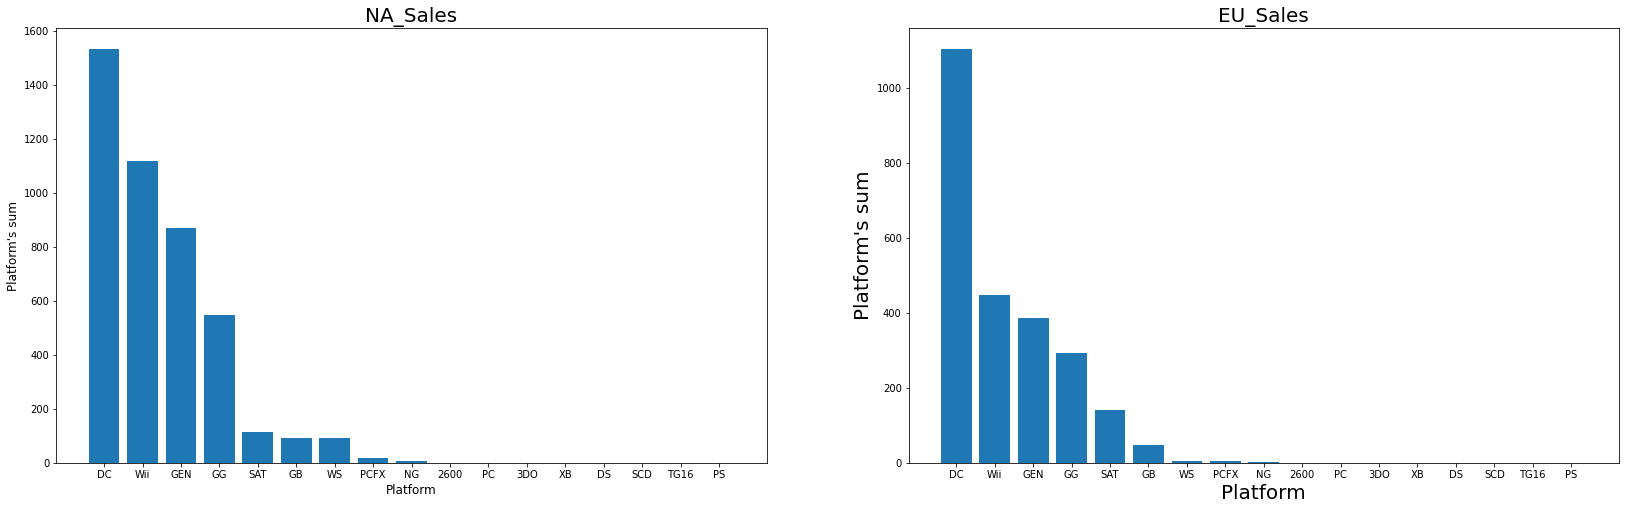

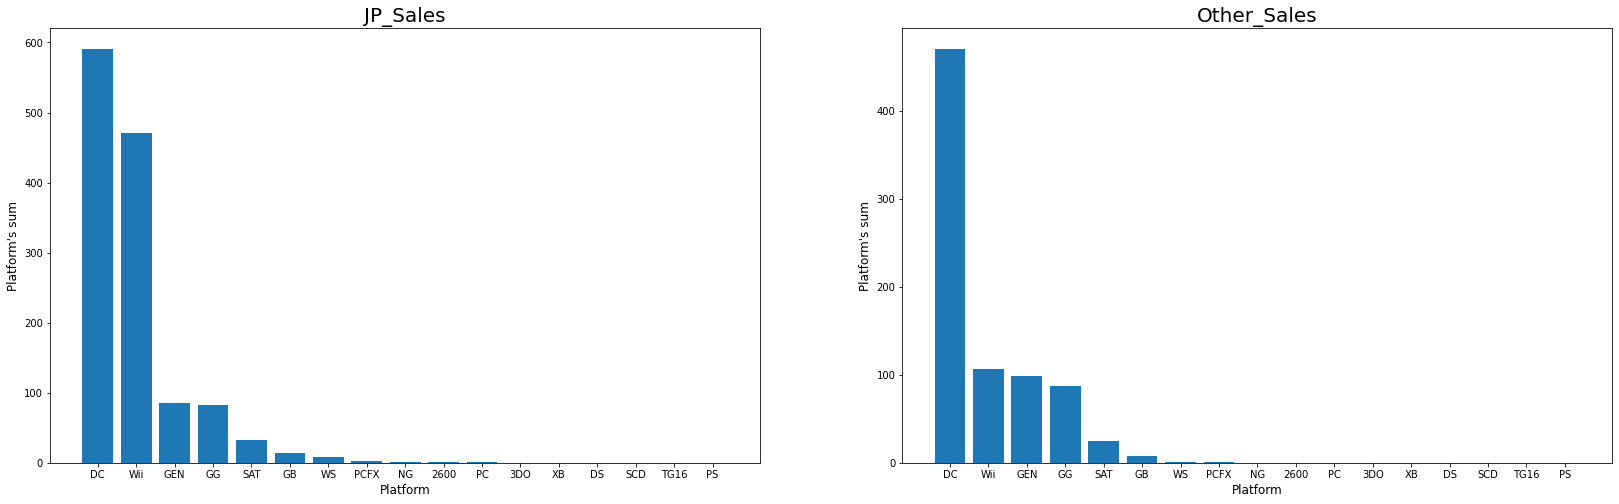

In [17]:
index = np.arange(len(df1))
plt.figure(figsize=(28,8))
plt.subplot(1, 2, 1)
plt.bar(index, df1['NA_Sales'].sort_values(ascending=False))
plt.title('NA_Sales', fontsize=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Platform\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(index, df1['EU_Sales'].sort_values(ascending=False))
plt.title('EU_Sales', fontsize=20)
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Platform\'s sum', fontsize=20)
plt.xticks(index, df1.index, fontsize=10)


plt.figure(figsize=(28,8))
plt.subplot(1, 2, 1)
plt.bar(index, df1['JP_Sales'].sort_values(ascending=False))
plt.title('JP_Sales', fontsize=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Platform\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(index, df1['Other_Sales'].sort_values(ascending=False))
plt.title('Other_Sales', fontsize=20)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Platform\'s sum', fontsize=12)
plt.xticks(index, df1.index, fontsize=10)

plt.show()

# **추가로, 가까운 관계에있는 데이터들을 알아보려고 합니다. 4가지로 묶어서 보도록 하겠습니다.**

In [18]:
# !pip install kmodes

df=df.drop(['Name', 'Publisher', 'Year'], axis=1)
df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,Action,0.04,0.00,0.00,0.00
1,Wii,Action,0.17,0.00,0.00,0.01
2,PS,Adventure,0.00,0.00,0.02,0.00
3,DS,Misc,0.04,0.00,0.00,0.00
4,PS,Platform,0.12,0.09,0.00,0.04


In [19]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [0, 1]
df = df.dropna()
mark_array=df.values

kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)
# Cluster Centroids
print(kproto.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1726, ncost: 15684.648394505264
Run: 1, iteration: 2/20, moves: 601, ncost: 14353.933976804585
Run: 1, iteration: 3/20, moves: 1002, ncost: 13144.979687692672
Run: 1, iteration: 4/20, moves: 371, ncost: 12706.251955179041
Run: 1, iteration: 5/20, moves: 320, ncost: 12494.594383823174
Run: 1, iteration: 6/20, moves: 277, ncost: 12345.453409298729
Run: 1, iteration: 7/20, moves: 172, ncost: 12308.824598387413
Run: 1, iteration: 8/20, moves: 100, ncost: 12294.374110422921
Run: 1, iteration: 9/20, moves: 68, ncost: 12274.968648944108
Run: 1, iteration: 10/20, moves: 51, ncost: 12272.598932169092
Run: 1, iteration: 11/20, moves: 57, ncost: 12271.239156040343
Run: 1, iteration: 12/20, moves: 664, ncost: 12231.263704816662
Run: 1, iteration: 13/20, moves: 1068, ncost: 12132.53327845415
Run: 1, iteration: 14/20, moves: 859, ncost: 11978.906762977018
Run: 1, iteration: 15/20, moves: 4

In [20]:
# Prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df['cluster'] = list(clusters)

0번째 묶음은 평균보다 조금 위에있는 판매량들의 집합인 것 같습니다. 중간부근에 위치하겠네요

In [21]:
print(df[df['cluster']==0].count()[0])
df[df['cluster']== 0].head(10)

1004


,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster
31,XB,Misc,1.93,0.34,0.00,0.21,0
107,PS,Sports,1.19,0.07,0.05,0.20,0
126,PS,Fighting,1.98,0.55,0.00,0.32,0
165,PS,Racing,1.23,1.11,0.00,0.34,0
192,XB,Shooter,2.67,0.89,0.05,0.37,0
260,DS,Action,1.74,0.25,0.21,0.03,0
275,PS,Racing,1.19,0.17,0.00,0.05,0
292,PS,Sports,1.53,0.05,0.00,0.25,0
324,DC,Platform,1.26,0.61,0.46,0.08,0
338,XB,Role-Playing,1.94,0.86,0.03,0.24,0


1번째 묶음은 판매량이 가장 큰 데이터들의 묶음인 것 같습니다.

11개의 데이터가 이 묶음에 속해있습니다. 아마 가장 높고 분산도 큰 데이터들을 한 묶음으로 여긴 것 같습니다.

In [22]:
print(df[df['cluster']==1].count()[0])
df[df['cluster']== 1].head(10)

15463


,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster
0,DS,Action,0.04,0.00,0.00,0.00,1
1,Wii,Action,0.17,0.00,0.00,0.01,1
2,PS,Adventure,0.00,0.00,0.02,0.00,1
3,DS,Misc,0.04,0.00,0.00,0.00,1
4,PS,Platform,0.12,0.09,0.00,0.04,1
5,DS,Sports,0.00,0.00,0.14,0.00,1
6,PC,Simulation,0.02,0.01,0.00,0.00,1
7,PS,Action,0.07,0.00,0.11,0.01,1
8,PS,Adventure,0.00,0.00,0.04,0.00,1
9,PS,Action,0.04,0.03,0.00,0.01,1


2번째 묶음은 1번째보다 적은 판매량을 가지고 있는 묶음인 것 같습니다.

1036개의 데이터가 이 묶음에 속해있습니다. 높은 판매량을 가진 데이터들은 아닌 것 같습니다.

In [23]:
print(df[df['cluster']==2].count()[0])
df[df['cluster']== 2].head(10)

70


,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster
122,XB,Shooter,5.91,2.38,0.13,0.90,2
223,Wii,Misc,6.05,3.15,0.00,1.07,2
511,DS,Puzzle,3.44,5.36,5.32,1.18,2
577,DS,Racing,5.55,1.94,2.23,0.15,2
1005,PS,Racing,6.85,5.09,1.87,1.16,2
1810,DS,Role-Playing,4.34,2.65,3.15,0.35,2
2008,PS,Action,3.80,5.81,0.36,2.02,2
2809,XB,Shooter,9.03,4.28,0.13,1.32,2
3007,DS,Platform,5.99,2.15,2.12,0.29,2
3273,DS,Simulation,2.55,3.52,5.33,0.88,2


3번째 묶음은 판매량이 거의 0에 수렴하는 데이터들의 집합입니다.
15425개나 이 묶음에 속해있습니다. 아마도 대부분의 데이터가 이 부근에 밀집되어 있을 것입니다.

In [24]:
print(df[df['cluster']==3].count()[0])
df[df['cluster']==3].head(10)

11


,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,cluster
1203,GB,Puzzle,23.20,2.26,4.22,0.58,3
2908,Wii,Sports,41.49,29.02,3.77,8.46,3
3014,Wii,Misc,14.03,9.20,2.93,2.85,3
3352,Wii,Sports,15.75,11.01,3.28,2.96,3
4199,DS,Platform,29.08,3.58,6.81,0.77,3
4343,XB,Misc,14.97,4.94,0.24,1.67,3
6937,DS,Platform,11.38,9.23,6.50,2.90,3
7829,GB,Role-Playing,11.27,8.89,10.22,1.00,3
10488,DS,Shooter,26.93,0.63,0.28,0.47,3
12579,Wii,Racing,15.85,12.88,3.79,3.31,3
